In [9]:
import os
import csv
import re

# 定义一个函数来处理单个文件
def process_file(file_path, result):
    with open(file_path, 'r') as f:
        data = f.readlines()

        # 使用正则表达式匹配数据行中的键和值
        for line in data:
            if line.startswith("all") or line.startswith("sway with") or \
            line.startswith("xpln on") or line.startswith("sort with"):
                # 匹配键
                key = ['CityMPG+_mean','Class-_mean','HighwayMPG+_mean','N_mean','Weight-_mean','CityMPG+_div','Class-_div','HighwayMPG+_div','N_div','Weight-_div']
                # 匹配值
                value = re.findall(r"[-+]?\d*\.\d+|\d+", line)
                value = [float(v) for v in value]
                # 存储在相应的字典中
                if line.startswith("all"):
                    for i, k in enumerate(key):
                        if k not in result["all"]:
                            result["all"][k] = []
                        result["all"][k].append(value[i])
                elif line.startswith("sway with"):
                    for i, k in enumerate(key):
                        if k not in result["sway with"]:
                            result["sway with"][k] = []
                        result["sway with"][k].append(value[i])
                elif line.startswith("xpln on"):
                    for i, k in enumerate(key):
                        if k not in result["xpln on"]:
                            result["xpln on"][k] = []
                        result["xpln on"][k].append(value[i])
                elif line.startswith("sort with"):
                    for i, k in enumerate(key):
                        if k not in result["sort with"]:
                            result["sort with"][k] = []
                        result["sort with"][k].append(value[i])


# 定义一个函数来处理一个文件夹
def process_folder(folder_path):
    data_dict = {'all':{},'sway with':{},'xpln on':{},'sort with':{}}

    for file_name in os.listdir(folder_path):
        if file_name.endswith('.out'):
            file_path = os.path.join(folder_path, file_name)
            process_file(file_path, data_dict)

    return data_dict

# 处理所有文件夹
root_folder = './out2'
auto2_data = {}
for folder_path, _, file_names in os.walk(root_folder):
    folder_name = os.path.basename(folder_path)
    if folder_name == root_folder:
        continue
    folder_name = folder_name.split('.')[0]
    auto2_data[folder_name] = process_folder(folder_path)



In [55]:
import matplotlib.pyplot as plt
import numpy as np

def draw(col2s, col3s):
    fig = plt.figure(figsize =(15, 7))
    i = j =0

    for col2 in col2s: #rows
        i += 1
        j = 0
        for col3 in col3s: 
            j+=1
            d1 = auto2_data['auto2'][col2][col3]
            d2 = auto2_data['low_auto2'][col2][col3]
            d3 = auto2_data['high_auto2'][col2][col3]
            d4 = auto2_data['iter_low_auto2'][col2][col3]
            d5 = auto2_data['iter_high_auto2'][col2][col3]
            d6 = auto2_data['knn_low_auto2'][col2][col3]
            d7 = auto2_data['knn_high_auto2'][col2][col3]

            data = [d2,d4,d6]
            plt.subplot(4,4,(i-1)*8+j)
            plt.boxplot(data, labels=['low','iter_low','knn_low'], )

            data = [d3,d5,d7]
            plt.subplot(4,4,(i-1)*8+j+4)
            plt.boxplot(data, labels=['high','iter_high','knn_high'])

    plt.tight_layout()    
    plt.show()

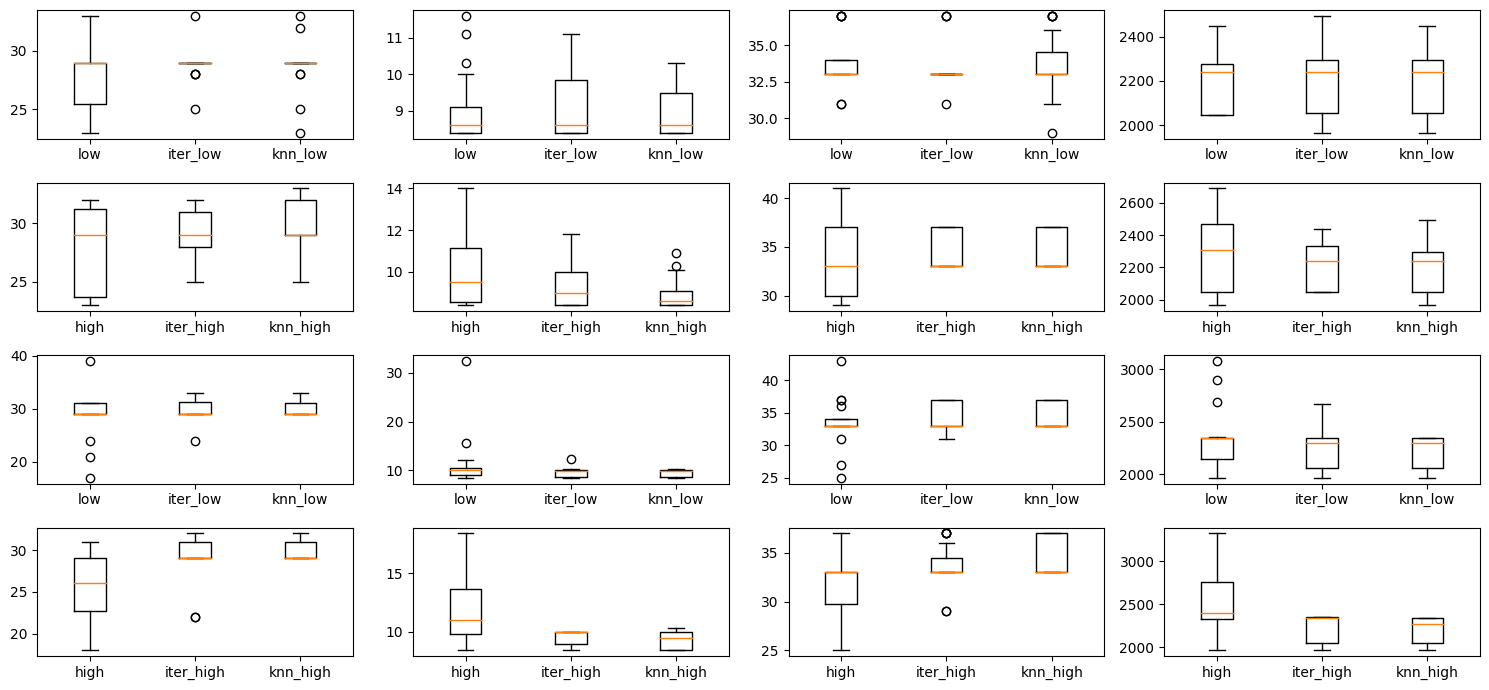

In [56]:
draw(['sway with','xpln on'],['CityMPG+_mean','Class-_mean','HighwayMPG+_mean','Weight-_mean'])

In [25]:
d1 = auto2_data['auto2']['sway with']['Weight-_mean']
d2 = auto2_data['low_auto2']['sway with']['CityMPG+_mean']
d3 = auto2_data['high_auto2']['sway with']['CityMPG+_mean']
d4 = auto2_data['iter_low_auto2']['sway with']['CityMPG+_mean']
d5 = auto2_data['iter_high_auto2']['sway with']['CityMPG+_mean']
d6 = auto2_data['knn_low_auto2']['sway with']['CityMPG+_mean']
d7 = auto2_data['knn_high_auto2']['sway with']['CityMPG+_mean']

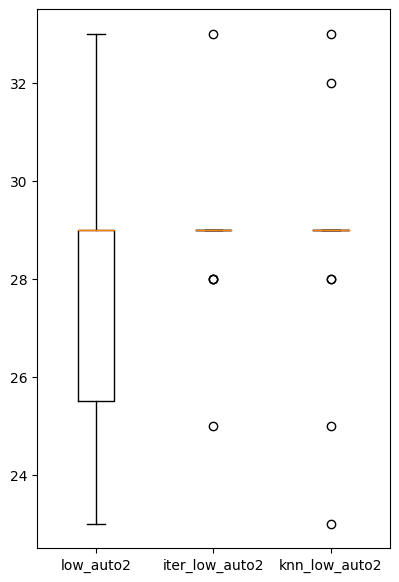

In [33]:
import matplotlib.pyplot as plt
import numpy as np

data = [d2,d4,d6]
fig = plt.figure(figsize =(10, 7))
plt.subplot(1,2,1)
plt.boxplot(data, labels=['low_auto2','iter_low_auto2','knn_low_auto2'])
#plt.set_xticklabels(['low_auto2','iter_low_auto2','knn_low_auto2'])

plt.show()

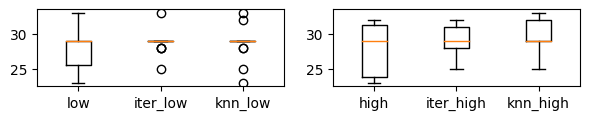

In [45]:
data = [d2,d4,d6]
fig = plt.figure(figsize =(7, 1))
plt.subplot(1,2,1)
plt.boxplot(data, labels=['low','iter_low','knn_low'])

data = [d3,d5,d7]
plt.subplot(1,2,2)
plt.boxplot(data, labels=['high','iter_high','knn_high'])
#plt.set_xticklabels(['low_auto2','iter_low_auto2','knn_low_auto2'])

plt.show()

/var/folders/g1/b4qg48_543s00p8v5glsmfl40000gn/T/ipykernel_86559/1900996562.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['low_auto2','iter_low_auto2','knn_low_auto2'])


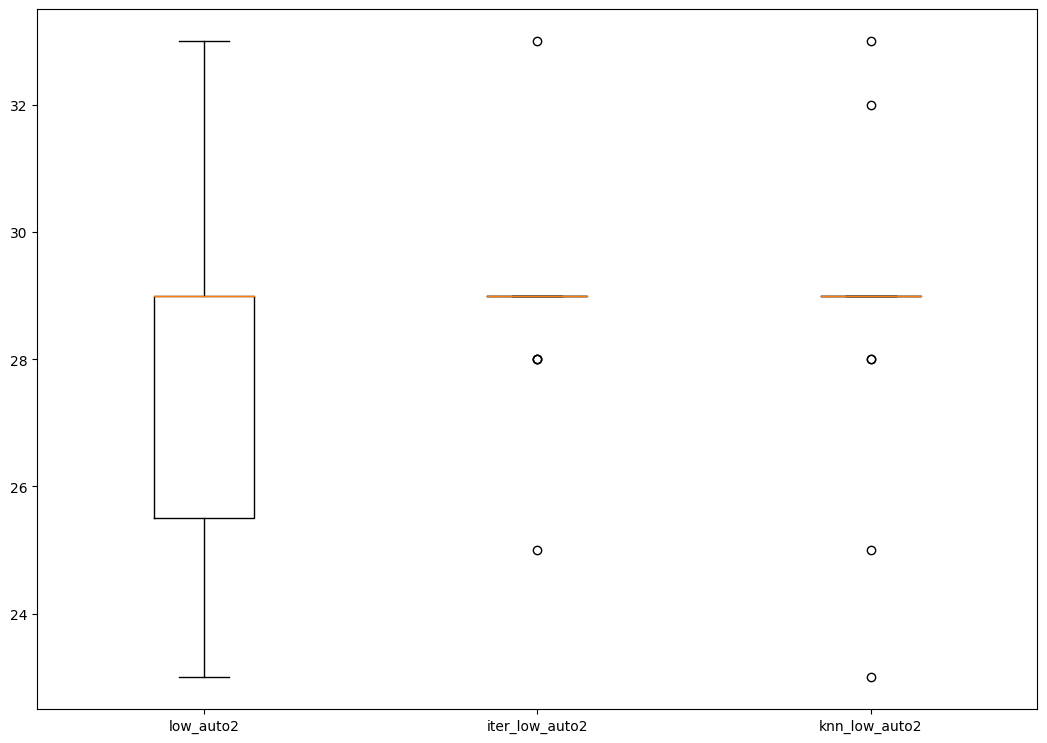

In [29]:
import matplotlib.pyplot as plt
import numpy as np

data = [d2,d4,d6]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xticklabels(['low_auto2','iter_low_auto2','knn_low_auto2'])

bp = ax.boxplot(data)


plt.show()

/var/folders/g1/b4qg48_543s00p8v5glsmfl40000gn/T/ipykernel_86559/1016865623.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['high_auto2','iter_high_auto2','knn_high_auto2'])


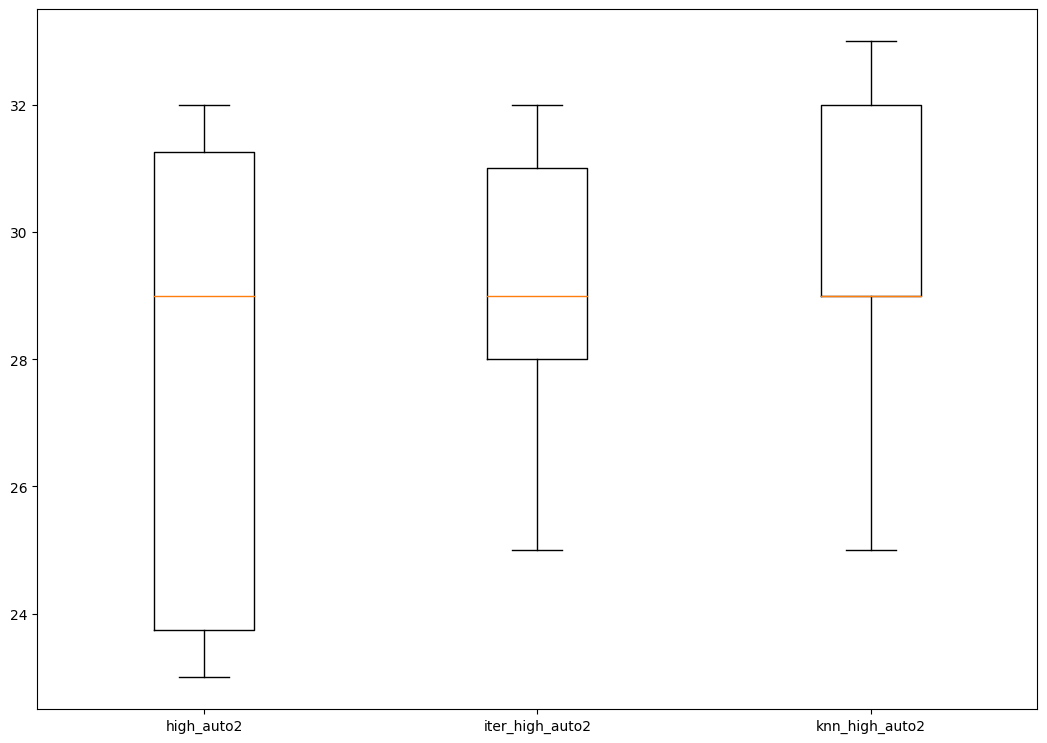

In [16]:
data = [d3,d5,d7]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xticklabels(['high_auto2','iter_high_auto2','knn_high_auto2'])

bp = ax.boxplot(data)


plt.show()

In [18]:
d1 = auto2_data['auto2']['xpln on']['CityMPG+_mean']
d2 = auto2_data['low_auto2']['xpln on']['CityMPG+_mean']
d3 = auto2_data['high_auto2']['xpln on']['CityMPG+_mean']
d4 = auto2_data['iter_low_auto2']['xpln on']['CityMPG+_mean']
d5 = auto2_data['iter_high_auto2']['xpln on']['CityMPG+_mean']
d6 = auto2_data['knn_low_auto2']['xpln on']['CityMPG+_mean']
d7 = auto2_data['knn_high_auto2']['xpln on']['CityMPG+_mean']

/var/folders/g1/b4qg48_543s00p8v5glsmfl40000gn/T/ipykernel_86559/3914002741.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['low_auto2','iter_low_auto2','knn_low_auto2'])


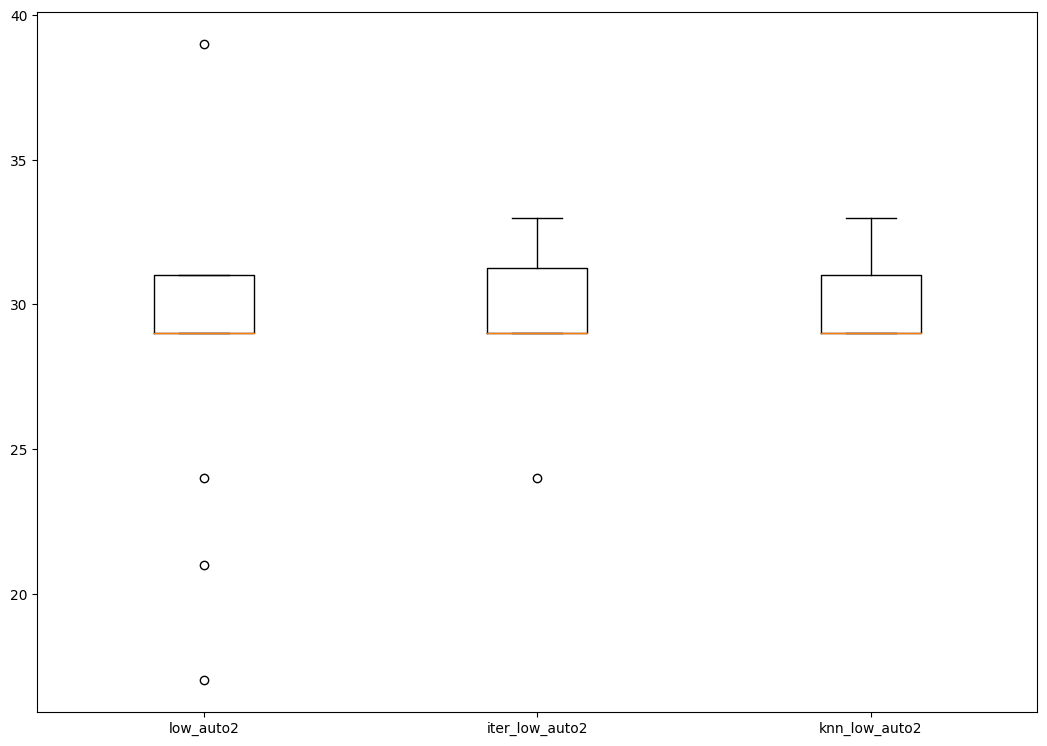

In [19]:
data = [d2,d4,d6]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xticklabels(['low_auto2','iter_low_auto2','knn_low_auto2'])

bp = ax.boxplot(data)


plt.show()

/var/folders/g1/b4qg48_543s00p8v5glsmfl40000gn/T/ipykernel_86559/1016865623.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['high_auto2','iter_high_auto2','knn_high_auto2'])


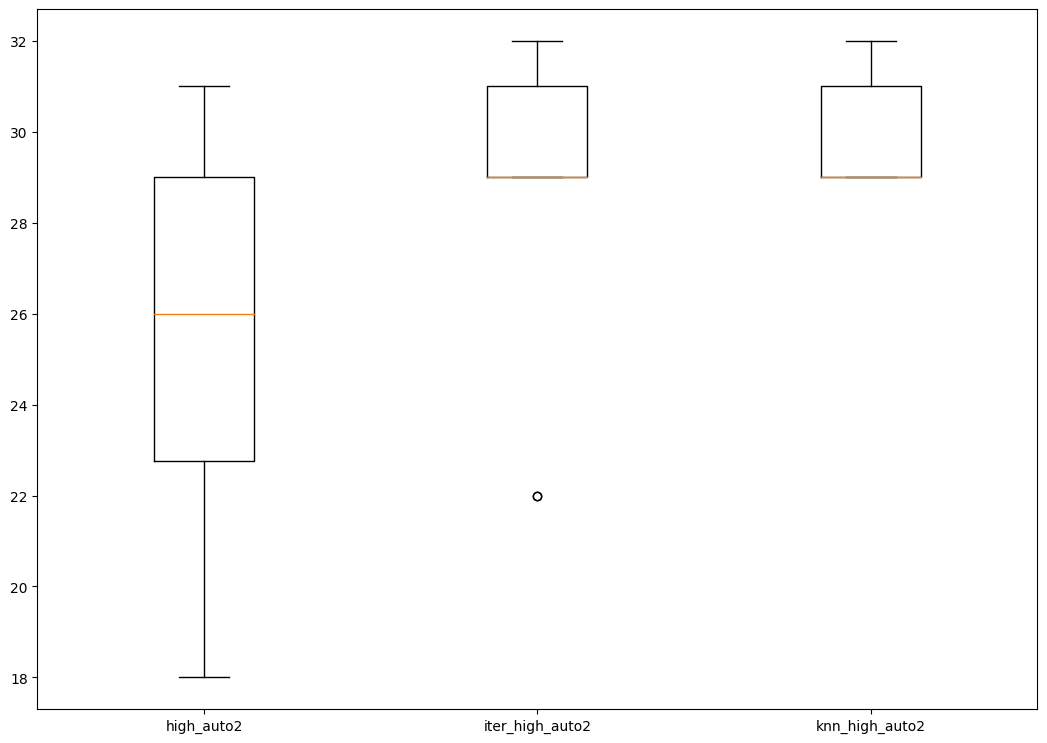

In [20]:
data = [d3,d5,d7]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xticklabels(['high_auto2','iter_high_auto2','knn_high_auto2'])

bp = ax.boxplot(data)


plt.show()

In [21]:
d1 = auto2_data['auto2']['sway with']['Class-_mean']
d2 = auto2_data['low_auto2']['sway with']['Class-_mean']
d3 = auto2_data['high_auto2']['sway with']['Class-_mean']
d4 = auto2_data['iter_low_auto2']['sway with']['Class-_mean']
d5 = auto2_data['iter_high_auto2']['sway with']['Class-_mean']
d6 = auto2_data['knn_low_auto2']['sway with']['Class-_mean']
d7 = auto2_data['knn_high_auto2']['sway with']['Class-_mean']

/var/folders/g1/b4qg48_543s00p8v5glsmfl40000gn/T/ipykernel_86559/3914002741.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['low_auto2','iter_low_auto2','knn_low_auto2'])


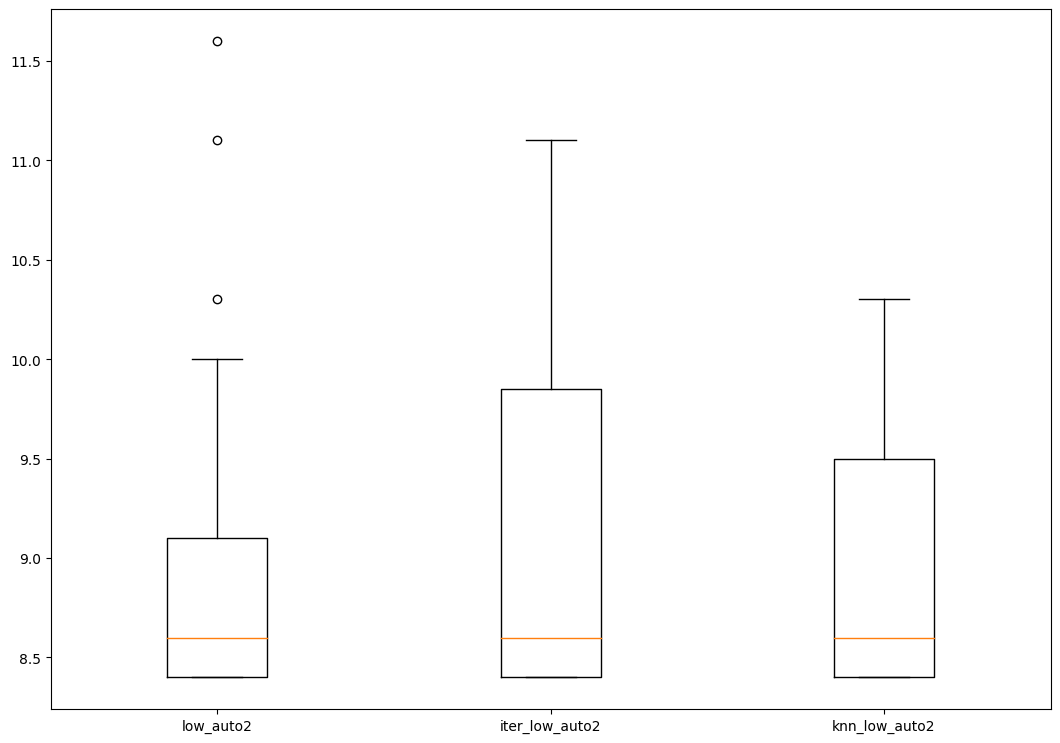

In [22]:
data = [d2,d4,d6]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xticklabels(['low_auto2','iter_low_auto2','knn_low_auto2'])

bp = ax.boxplot(data)


plt.show()

/var/folders/g1/b4qg48_543s00p8v5glsmfl40000gn/T/ipykernel_86559/1016865623.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['high_auto2','iter_high_auto2','knn_high_auto2'])


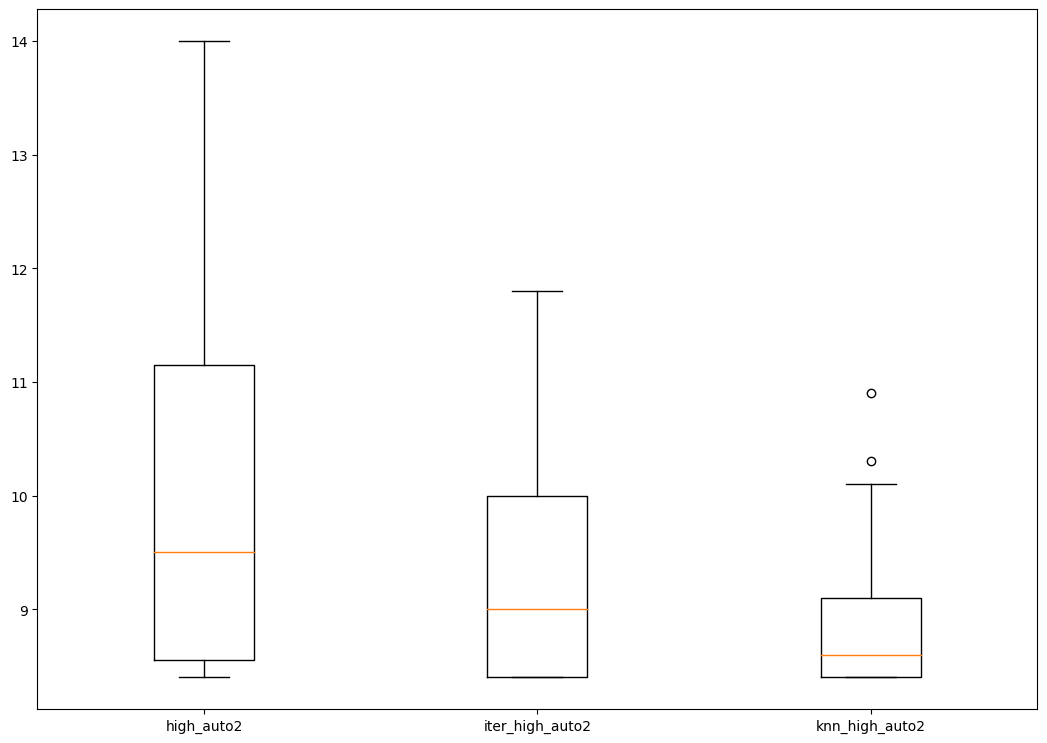

In [23]:
data = [d3,d5,d7]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xticklabels(['high_auto2','iter_high_auto2','knn_high_auto2'])

bp = ax.boxplot(data)


plt.show()